In [1]:
import numpy as np
from matplotlib import pyplot as plt

import AFG31000 as awg
awg_ip = "192.168.0.149"

from sigproc_kit import *

from ipywidgets import interact

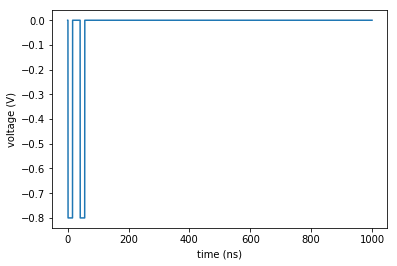

In [2]:
##################################################
##          create arbitrary waveform           ##
##################################################




period = 1000e-9

x=np.arange(0,period,0.1e-9)

amp = -0.8
width = 15e-9

y= amp*(
      square_pulse(x, width=width, delay=1e-9)
    + square_pulse(x, width=width, delay=41e-9)
       )

plt.plot(x*1e9,y)
plt.xlabel("time (ns)")
plt.ylabel("voltage (V)")
plt.show()



In [7]:
##################################################
##                interactive                   ##
##################################################


period = 1000e-9

plot_r = 100e-9

x=np.arange(0,period,0.1e-9)

amp = -0.8
start_ns = 1;
y = 0*x 

def my_function(width_ns=15,dist_ns=20,n=3):
    global y
    y = 0*x 
    for i in range(n):
        y += amp*square_pulse(x, width=width_ns*1e-9, delay=(start_ns+i*dist_ns)*1e-9)

    plt.plot(x*1e9,y)
    plt.xlabel("time (ns)")
    plt.ylabel("voltage (V)")
    plt.xlim(0,plot_r*1e9)
    plt.show()

# create a slider
interact(my_function,
         width_ns=(1,100,0.1),
         dist_ns=(2,100,0.1),
         n=(1,10,1)
        )



interactive(children=(FloatSlider(value=15.0, description='width_ns', min=1.0), FloatSlider(value=20.0, descri…

<function __main__.my_function(width_ns=15, dist_ns=20, n=3)>

In [15]:
##################################################
##        send arbitrary waveform to CH1        ##
##################################################


awg.send_data(x,y,ip=awg_ip,trace=1,period=period)

target ip : 192.168.0.149
connect to device ...
*IDN?
TEKTRONIX,AFG31252,C010446,SCPI:99.0 FV:1.6.1
success!
idle val: 0.0
preparing data for channel 1
sending data ...
waveform length: 2000
sample length: 2000
close socket


In [5]:
##################################################
##           send square pulse to CH2           ##
##################################################


awg.pulser(
    period=period,
    ip=awg_ip,
    trace=2,
    leading_edge=1e-9,
    trailing_edge=1e-9,
    on_val=0.25,
    idle_val=0,
    delay=10e-9,
    width=30e-9

)

target ip : 192.168.0.178
connect to device ...
*IDN?
TEKTRONIX,AFG31252,C011442,SCPI:99.0 FV:1.5.2
success!
preparing data for channel 2
sending data ...
waveform length: 200
sample length: 200
close socket
